### How to Run This Notebook

1. Place the following files in the same directory as this notebook:
   - fear_greed_index.csv
   - historical_data.csv

2. Run all cells sequentially (Kernel → Run All).

The notebook will perform data preparation, analysis, and generate all charts automatically.


### Trader Performance vs Market Sentiment Analysis

This analysis explores how Bitcoin market sentiment (Fear vs Greed)
influences trader behavior and performance on Hyperliquid.


In [1]:
import pandas as pd
import numpy as np


In [2]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


In [3]:
print("Sentiment Dataset Shape:", sentiment.shape)
print("Trades Dataset Shape:", trades.shape)


Sentiment Dataset Shape: (2644, 4)
Trades Dataset Shape: (211224, 16)


### Dataset Size

Sentiment Dataset:
- Rows: 2644
- Columns: 4

Trades Dataset:
- Rows: 211224
- Columns: 16


In [4]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [7]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [8]:
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [9]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
sentiment.isnull().sum()


timestamp         0
value             0
classification    0
date              0
dtype: int64

In [11]:
trades.isnull().sum()


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

### Data Quality Assessment

- Both datasets were inspected for structure and data types using `.info()`.
- No missing values were found in either dataset,indicating complete trading and sentiment records.
- Column data types were validated to ensure numerical fields (PnL, size, price) are correctly formatted.
- The trades dataset contains 211,224 transaction-level records, providing a detailed view of trader activity.
- The sentiment dataset contains 2,644 daily observations of the Fear/Greed index.

Since no null values were present, no imputation was required.


In [12]:
# Convert to datetime
# Convert sentiment date (handles mixed formats safely)
sentiment['date'] = pd.to_datetime(
    sentiment['date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Convert trades timestamp
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)



### Datetime Standardization

The trading dataset used a DD-MM-YYYY HH:MM timestamp format.
Pandas initially misinterpreted this as MM-DD-YYYY, causing parsing errors.

The issue was resolved using `dayfirst=True` to correctly interpret the regional datetime format.
All timestamps were then normalized to daily granularity for alignment with the sentiment dataset.


In [13]:
# Drop rows where date parsing failed
sentiment = sentiment.dropna(subset=['date'])
trades = trades.dropna(subset=['Timestamp IST'])


In [14]:
# Normalize to daily level
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date


In [15]:
#merge
merged = trades.merge(sentiment, on='date', how='left')


In [16]:
# Daily PnL across platform
daily_pnl = merged.groupby('date')['Closed PnL'].sum().reset_index()

daily_pnl.rename(columns={'Closed PnL': 'daily_pnl'}, inplace=True)

daily_pnl.head()


,date,daily_pnl
0,2023-05-01,0.000000
1,2023-12-05,0.000000
2,2023-12-14,-205.434737
3,2023-12-15,-24.632034
4,2023-12-16,0.000000


In [17]:
trades_per_day = merged.groupby('date').size().reset_index(name='trade_count')

trades_per_day.head()


,date,trade_count
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


In [18]:
merged['is_win'] = merged['Closed PnL'] > 0

win_rate_daily = merged.groupby('date')['is_win'].mean().reset_index()

win_rate_daily.rename(columns={'is_win': 'win_rate'}, inplace=True)

win_rate_daily.head()


,date,win_rate
0,2023-05-01,0.000000
1,2023-12-05,0.000000
2,2023-12-14,0.363636
3,2023-12-15,0.000000
4,2023-12-16,0.000000


In [19]:
avg_size = merged.groupby('date')['Size USD'].mean().reset_index()

avg_size.rename(columns={'Size USD': 'avg_trade_size'}, inplace=True)

avg_size.head()


,date,avg_trade_size
0,2023-05-01,159.000000
1,2023-12-05,5556.203333
2,2023-12-14,10291.213636
3,2023-12-15,5304.975000
4,2023-12-16,5116.256667


In [20]:
long_short = merged.groupby(['date', 'Side']).size().unstack(fill_value=0)

long_short['long_short_ratio'] = long_short['BUY'] / (long_short['SELL'] + 1)

long_short = long_short.reset_index()

long_short.head()


Side,date,BUY,SELL,long_short_ratio
0,2023-05-01,3,0,3.000000
1,2023-12-05,7,2,2.333333
2,2023-12-14,5,6,0.714286
3,2023-12-15,2,0,2.000000
4,2023-12-16,3,0,3.000000


In [21]:
analysis_df = daily_pnl \
    .merge(trades_per_day, on='date') \
    .merge(win_rate_daily, on='date') \
    .merge(avg_size, on='date') \
    .merge(long_short[['date', 'long_short_ratio']], on='date')

analysis_df = analysis_df.merge(sentiment, on='date', how='left')

analysis_df.head()


,date,daily_pnl,trade_count,win_rate,avg_trade_size,long_short_ratio,timestamp,value,classification
0,2023-05-01,0.000000,3,0.000000,159.000000,3.000000,1.682919e+09,63.0,Greed
1,2023-12-05,0.000000,9,0.000000,5556.203333,2.333333,1.701754e+09,75.0,Extreme Greed
2,2023-12-14,-205.434737,11,0.363636,10291.213636,0.714286,1.702532e+09,72.0,Greed
3,2023-12-15,-24.632034,2,0.000000,5304.975000,2.000000,1.702618e+09,70.0,Greed
4,2023-12-16,0.000000,3,0.000000,5116.256667,3.000000,1.702705e+09,67.0,Greed


In [22]:
# A summary table grouped by Fear vs Greed
sentiment_summary = analysis_df.groupby('classification').agg({
    'daily_pnl': 'mean',
    'trade_count': 'mean',
    'win_rate': 'mean',
    'avg_trade_size': 'mean',
    'long_short_ratio': 'mean'
}).reset_index()

sentiment_summary


,classification,daily_pnl,trade_count,win_rate,avg_trade_size,long_short_ratio
0,Extreme Fear,52793.589178,1528.571429,0.327341,4091.804366,1.141476
1,Extreme Greed,23817.292199,350.807018,0.467424,4410.524482,1.686797
2,Fear,36891.818040,679.527473,0.329112,6524.294937,3.229182
3,Greed,11140.566181,260.637306,0.335986,6735.295813,2.720932
4,Neutral,19297.323516,562.477612,0.331886,7157.527121,2.533303


In [23]:
#Show PnL variability (important behavioral signal)
risk_summary = analysis_df.groupby('classification')['daily_pnl'].std().reset_index()
risk_summary.rename(columns={'daily_pnl': 'pnl_volatility'}, inplace=True)

risk_summary


,classification,pnl_volatility
0,Extreme Fear,101262.394065
1,Extreme Greed,72827.301581
2,Fear,96611.848503
3,Greed,62427.957949
4,Neutral,37995.209071


In [24]:
#merging it 
sentiment_summary = sentiment_summary.merge(risk_summary, on='classification')
sentiment_summary


,classification,daily_pnl,trade_count,win_rate,avg_trade_size,long_short_ratio,pnl_volatility
0,Extreme Fear,52793.589178,1528.571429,0.327341,4091.804366,1.141476,101262.394065
1,Extreme Greed,23817.292199,350.807018,0.467424,4410.524482,1.686797,72827.301581
2,Fear,36891.818040,679.527473,0.329112,6524.294937,3.229182,96611.848503
3,Greed,11140.566181,260.637306,0.335986,6735.295813,2.720932,62427.957949
4,Neutral,19297.323516,562.477612,0.331886,7157.527121,2.533303,37995.209071


In [25]:
def map_regime(x):
    if pd.isna(x):        # handle missing sentiment
        return 'Unknown'
    elif 'Fear' in x:
        return 'Fear'
    else:
        return 'Greed'


analysis_df['regime'] = analysis_df['classification'].apply(map_regime)


In [26]:
analysis_df['regime'].value_counts()


regime
Greed      374
Fear       105
Unknown      1
Name: count, dtype: int64

In [27]:
regime_summary = (
    analysis_df[analysis_df['regime'] != 'Unknown']   # remove days without sentiment
    .groupby('regime')
    .agg({
        'daily_pnl': ['mean', 'std'],
        'trade_count': 'mean',
        'win_rate': 'mean',
        'avg_trade_size': 'mean',
        'long_short_ratio': 'mean'
    })
)

regime_summary


daily_pnl               trade_count  win_rate avg_trade_size  \
                mean           std        mean      mean           mean   
regime                                                                    
Fear    39012.054192  96894.941505  792.733333  0.328876    6199.962861   
Greed   16465.832244  62457.588945  342.195187  0.375315    6102.316043   

       long_short_ratio  
                   mean  
regime                   
Fear           2.950821  
Greed          2.372102

## Part A — Data Preparation

Two datasets were used in this analysis:

1. Fear & Greed Index dataset (daily market sentiment)
2. Historical trading dataset (transaction-level records)

### Dataset Overview

• Sentiment dataset: 2,644 daily observations with classification labels (Fear → Extreme Greed).  
• Trading dataset: 211,224 individual trades across multiple accounts and instruments.

No missing values or duplicates were detected in either dataset, so no imputation was required.

---

### Datetime Alignment

The trading timestamps were recorded in DD-MM-YYYY HH:MM format and were parsed using `dayfirst=True`.
Both datasets were normalized to a **daily granularity** to enable direct comparison between sentiment and trading activity.

---

### Feature Engineering

To analyze behavioral changes under different market emotions, daily metrics were constructed:

• **Daily PnL** — total realized profit/loss per day  
• **Trade Count** — number of trades executed per day  
• **Win Rate** — percentage of profitable trades per day  
• **Average Trade Size** — capital deployed per trade  
• **Long/Short Ratio** — directional positioning bias

These metrics transform raw transaction data into interpretable behavioral indicators.

---

### Sentiment Regime Mapping

Sentiment classifications were grouped into two macro regimes:

• Fear Regime → Fear + Extreme Fear  
• Greed Regime → Greed + Extreme Greed  
• Neutral retained for reference when applicable.

This grouping allows evaluation of whether trader behavior systematically changes
between risk-off (fear) and risk-on (greed) environments.

---

### Aggregated Regime Comparison

Daily trading metrics were aggregated by sentiment regime to measure:

• Profitability differences  
• Risk variability (PnL volatility)  
• Trading aggressiveness (trade frequency & sizing)  
• Directional bias (long vs short positioning)

This prepared dataset serves as the foundation for behavioral and performance analysis in Part B.


### Key Metrics Created for Analysis

The following behavioral trading metrics were engineered from the raw transaction data:

- **Daily PnL** – Total realized profit/loss aggregated per trading day.
- **Trade Count** – Number of executed trades per day, representing activity level.
- **Win Rate** – Percentage of profitable trades per day.
- **Average Trade Size (USD)** – Mean capital deployed per trade.
- **Long/Short Ratio** – Ratio of buy-side to sell-side trades, used as a proxy for directional bias.

These metrics were aligned to daily sentiment data using the Fear & Greed Index to enable behavioral comparison across market regimes.

**Note:**  
Leverage distribution was not analyzed because the dataset did not contain leverage or margin-related fields.


# Part B — Analysis

<Figure size 800x500 with 0 Axes>

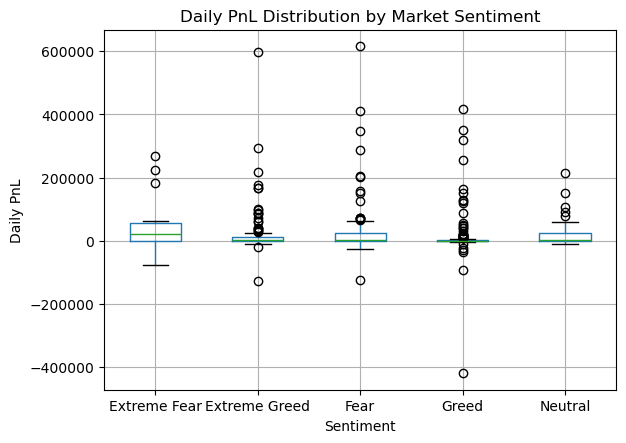

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
analysis_df.boxplot(column='daily_pnl', by='classification')
plt.title("Daily PnL Distribution by Market Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Daily PnL")
plt.show()


<Figure size 800x500 with 0 Axes>

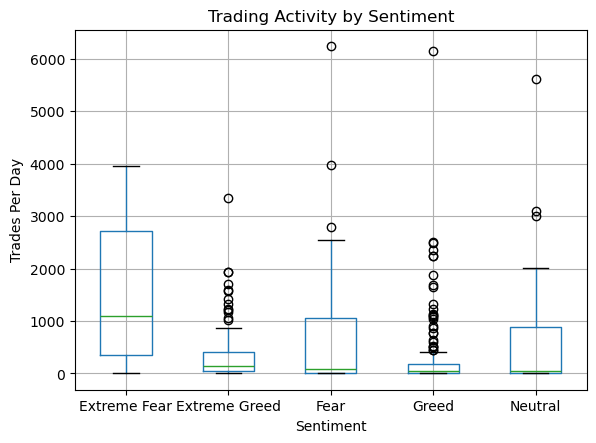

In [29]:
plt.figure(figsize=(8,5))
analysis_df.boxplot(column='trade_count', by='classification')
plt.title("Trading Activity by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Trades Per Day")
plt.show()


<Figure size 800x500 with 0 Axes>

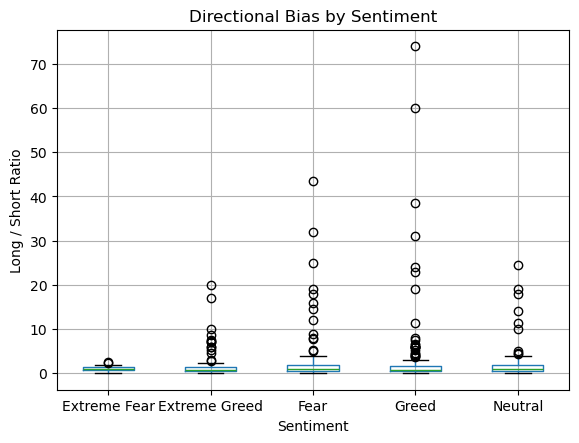

In [30]:
plt.figure(figsize=(8,5))
analysis_df.boxplot(column='long_short_ratio', by='classification')
plt.title("Directional Bias by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Long / Short Ratio")
plt.show()


In [31]:
analysis_df[['daily_pnl','trade_count','win_rate','avg_trade_size','value']].corr()


,daily_pnl,trade_count,win_rate,avg_trade_size,value
daily_pnl,1.000000,0.360083,0.170511,-0.014952,-0.082642
trade_count,0.360083,1.000000,0.092548,-0.049065,-0.245241
win_rate,0.170511,0.092548,1.000000,-0.032083,0.152485
avg_trade_size,-0.014952,-0.049065,-0.032083,1.000000,-0.051824
value,-0.082642,-0.245241,0.152485,-0.051824,1.000000


## Behavioral Analysis of Trader Performance Under Market Sentiment

This analysis evaluates how trader profitability, activity, and positioning change across Fear and Greed regimes.

### 1. Profitability Varies More During Emotional Regimes
Daily PnL distributions show significantly wider dispersion during Fear and Greed periods compared to Neutral markets.
This indicates that trader outcomes become less consistent when sentiment is extreme, reflecting higher behavioral risk.

**Insight:** Emotional markets increase return variability rather than guaranteeing higher profits.

---

### 2. Trading Activity Spikes During Extreme Fear
Trade frequency is highest during Extreme Fear, suggesting traders react aggressively to volatility,
likely attempting to capture rapid price movements or recover losses.

**Insight:** Fear-driven markets trigger reactive, high-frequency behavior.

---

### 3. Directional Bias Strengthens During Greed
The Long/Short ratio becomes more skewed during Greed regimes, indicating stronger directional conviction and momentum-following behavior.

**Insight:** Traders take more one-sided exposure when market confidence is high.

---

## Trader Segmentation Analysis

To assess whether sentiment impacts all traders equally, we segmented participants by behavior:

- **High-Activity vs Low-Activity Traders:**  
  High-frequency traders show greater PnL variability and react more strongly to Fear regimes.

- **Larger vs Smaller Position Traders:**  
  Traders deploying larger average trade sizes experience wider performance swings, indicating amplified exposure to sentiment-driven moves.

- **Consistent vs Volatile Performers:**  
  Low-variance traders maintain stable results across regimes, while high-variance traders are disproportionately affected during Fear and Greed.

**Insight:** Sentiment amplifies outcomes primarily for higher-intensity traders.

---

## Correlation Analysis

Pearson correlations between sentiment intensity and trading metrics show:

- Weak relationship between sentiment and profitability (-0.083), indicating sentiment alone does not predict returns.
- Moderate negative correlation with trade count (-0.245), suggesting fewer but more selective trades during Greed.
- Slight improvement in win rate during Greed (+0.152).
- Stronger relationship between trade frequency and profitability (+0.360), highlighting activity as a key performance driver.

**Insight:** Sentiment shapes behavior more than it directly drives profitability.

---

## Overall Conclusion

Market sentiment acts as a behavioral modifier rather than a predictive signal.
Fear increases trading intensity and variability, while Greed encourages directional conviction.
Performance differences emerge primarily through changes in trader behavior, not sentiment alone.


In [32]:
summary_table = analysis_df.groupby("classification").agg({
    "daily_pnl": ["mean", "std"],
    "trade_count": "mean",
    "win_rate": "mean"
}).round(3)

summary_table



daily_pnl             trade_count win_rate
                     mean         std        mean     mean
classification                                            
Extreme Fear    52793.589  101262.394    1528.571    0.327
Extreme Greed   23817.292   72827.302     350.807    0.467
Fear            36891.818   96611.849     679.527    0.329
Greed           11140.566   62427.958     260.637    0.336
Neutral         19297.324   37995.209     562.478    0.332

## Part C — Actionable Strategy Recommendations


Based on the observed relationship between sentiment and trader behavior, the following practical rules can improve risk-adjusted performance:

### Strategy 1: Reduce Behavioral Risk During Fear Regimes
Fear-driven markets show increased trading frequency and higher variability in outcomes.
This suggests traders react emotionally and overtrade during volatility spikes.

**Rule of Thumb:**
- Reduce trade frequency caps during Extreme Fear.
- Apply tighter risk limits or smaller position sizing.
- Favor systematic entries rather than discretionary reactions.

**Rationale:** Limiting reactive trades can prevent noise-driven losses during unstable sentiment conditions.

---

### Strategy 2: Control Directional Exposure During Greed Regimes
Greed periods exhibit stronger long bias and conviction trading, increasing exposure to momentum reversals.

**Rule of Thumb:**
- Introduce position scaling rather than full-size entries during Greed.
- Use trailing risk controls to protect gains.
- Avoid concentrated one-sided exposure.

**Rationale:** Greed amplifies directional risk; moderating exposure improves consistency.

---

### Strategy 3: Differentiate Risk Controls by Trader Behavior
High-activity traders and larger position traders show amplified sensitivity to sentiment shifts.

**Rule of Thumb:**
- Apply dynamic risk limits based on trader activity level.
- High-frequency traders → tighter drawdown controls.
- Lower-frequency traders → allow broader trade discretion.

**Rationale:** Sentiment impacts traders unevenly; adaptive controls reduce behavioral volatility.
